In [1]:
import json
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression,Lasso,ElasticNet,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.metrics import r2_score
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
round(df['sepal_length'].mean(),2)

5.84

In [7]:
df['petal_width'].mode()

0    0.2
Name: petal_width, dtype: float64

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [10]:
df.describe(percentiles=[.02,.03,.04,.05,.95,.96,.97,.98,.99]).T

,count,mean,std,min,2%,3%,4%,5%,50%,95%,96%,97%,98%,99%,max
sepal_length,150.0,5.843333,0.828066,4.3,4.4,4.547,4.600,4.600,5.80,7.255,7.408,7.653,7.700,7.700,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.2,2.300,2.300,2.345,3.00,3.800,3.804,3.900,4.002,4.151,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.2,1.300,1.300,1.300,4.35,6.100,6.108,6.353,6.602,6.700,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.1,0.100,0.196,0.200,1.30,2.300,2.304,2.400,2.402,2.500,2.5


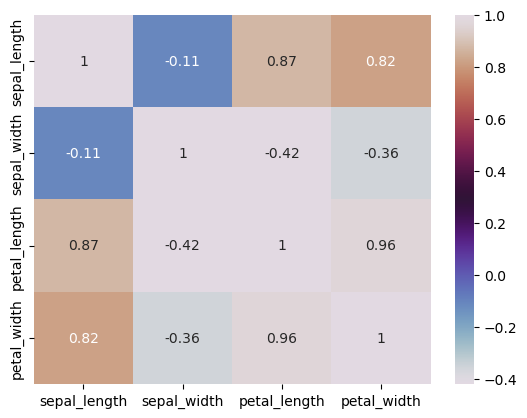

In [11]:
sns.heatmap(df.corr(), annot=True, cmap='twilight')
plt.show()

In [12]:
num= df.columns[df.dtypes!='object']

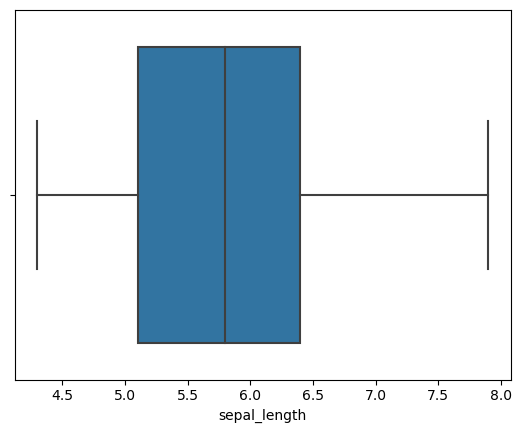

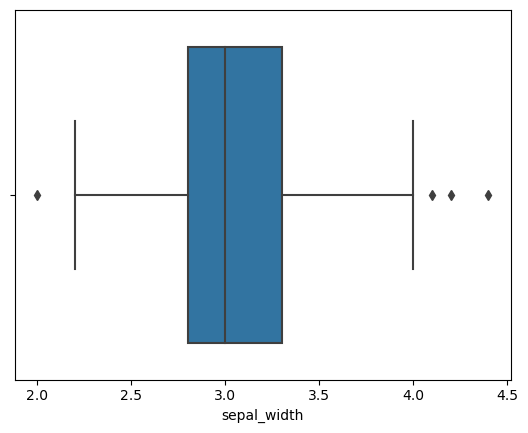

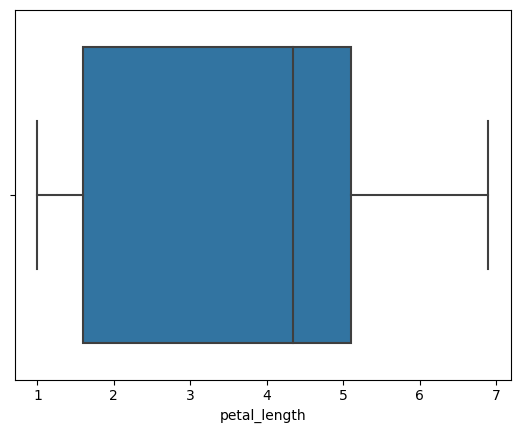

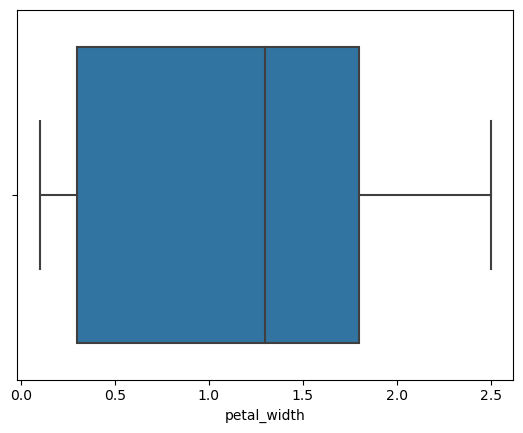

In [13]:
num
for i in num:
    sns.boxplot(x=df[i])
    plt.show()

In [14]:
dummi= pd.get_dummies(df, drop_first=True)

In [15]:
dummi

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,0,1
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


In [16]:
x=dummi.drop('petal_width', axis =1)
y=dummi['petal_width']

In [17]:
x.shape, y.shape

((150, 5), (150,))

In [18]:
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=.1,random_state=10)

In [19]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred=lr.predict(x_test)

In [21]:
r2_score = r2_score(y_test, y_pred)

In [22]:
print("R2_score :",r2_score )

R2_score : 0.9720044349868276


In [23]:
data={
    "session_name": "test",
    "session_description": "test",
    "design_state_data": {

      "session_info" : {
        "project_id": "1",
        "experiment_id": "kkkk-11",
        "dataset":"iris_modified.csv",
        "session_name": "test",
        "session_description": "test"
        },

      "target": {
        "prediction_type": "Regression",
        "target": "petal_width",
        "type":"regression",
        "partitioning": 'true'
      },
      "train": {
        "policy": "Split the dataset",
        "time_variable": "sepal_length",
        "sampling_method": "No sampling(whole data)",
        "split": "Randomly",
        "k_fold": 'false',
        "train_ratio": 0,
        "random_seed": 0
      },
      "metrics": {
        "optomize_model_hyperparameters_for": "AUC",
        "optimize_threshold_for": "F1 Score",
        "compute_lift_at": 0,
        "cost_matrix_gain_for_true_prediction_true_result": 1,
        "cost_matrix_gain_for_true_prediction_false_result": 0,
        "cost_matrix_gain_for_false_prediction_true_result": 0,
        "cost_matrix_gain_for_false_prediction_false_result": 0
      },
      "feature_handling": {
        "sepal_length": {
          "feature_name": "sepal_length",
          "is_selected": 'true',
          "feature_variable_type": "numerical",
          "feature_details": {
            "numerical_handling": "Keep as regular numerical feature",
            "rescaling": "No rescaling",
            "make_derived_feats": 'false',
            "missing_values": "Impute",
            "impute_with": "Average of values",
            "impute_value": 0
          }
        },
        "sepal_width": {
          "feature_name": "sepal_width",
          "is_selected": 'true',
          "feature_variable_type": "numerical",
          "feature_details": {
            "numerical_handling": "Keep as regular numerical feature",
            "rescaling": "No rescaling",
            "make_derived_feats": 'false',
            "missing_values": "Impute",
            "impute_with": "custom",
            "impute_value": -1
          }
        },
        "petal_length": {
          "feature_name": "petal_length",
          "is_selected": 'true',
          "feature_variable_type": "numerical",
          "feature_details": {
            "numerical_handling": "Keep as regular numerical feature",
            "rescaling": "No rescaling",
            "make_derived_feats": 'false',
            "missing_values": "Impute",
            "impute_with": "Average of values",
            "impute_value": 0
          }
        },
        "petal_width": {
          "feature_name": "petal_width",
          "is_selected": 'true',
          "feature_variable_type": "numerical",
          "feature_details": {
            "numerical_handling": "Keep as regular numerical feature",
            "rescaling": "No rescaling",
            "make_derived_feats": 'false',
            "missing_values": "Impute",
            "impute_with": "custom",
            "impute_value": -2
          }
        },
        "species": {
          "feature_name": "species",
          "is_selected": 'true',
          "feature_variable_type": "text",
          "feature_details": {
            "text_handling": "Tokenize and hash",
            "hash_columns": 0
          }
        }
      },
      "feature_generation": {
        "linear_interactions": [["petal_length", "sepal_width"]],
        "linear_scalar_type": "robust",
        "polynomial_interactions": [
          "petal_length/sepal_width",
          "petal_width/species"
        ],
        "explicit_pairwise_interactions": [
          "sepal_width/sepal_length",
          "petal_width/sepal_length"
        ]
      },
      "feature_reduction": {
        "feature_reduction_method": "Tree-based",
        "num_of_features_to_keep": "4",
        "num_of_trees": "5",
        "depth_of_trees": "6"
      },
      "hyperparameters": {
        "stratergy": "Grid Search",
        "shuffle_grid": 'true',
        "random_state": 1,
        "max_iterations": 2,
        "max_search_time": 3,
        "parallelism": 5,
        "cross_validation_stratergy": "Time-based K-fold(with overlap)",
        "num_of_folds": 6,
        "split_ratio": 0,
        "stratified": 'true'
      },
      "weighting_stratergy": {
        "weighting_stratergy_method": "Sample weights",
        "weighting_stratergy_weight_variable": "petal_length"
      },
      "probability_calibration": {
        "probability_calibration_method": "Sigmoid - Platt Scaling"
      },
      "algorithms": {
        "RandomForestClassifier": {
          "model_name": "Random Forest Classifier",
          "is_selected": 'false',
          "min_trees": 10,
          "max_trees": 30,
          "feature_sampling_statergy": "Default",
          "min_depth": 20,
          "max_depth": 30,
          "min_samples_per_leaf_min_value": 5,
          "min_samples_per_leaf_max_value": 50,
          "parallelism": 0
        },
        "RandomForestRegressor": {
          "model_name": "Random Forest Regressor",
          "is_selected": 'true',
          "min_trees": 10,
          "max_trees": 20,
          "feature_sampling_statergy": "Default",
          "min_depth": 20,
          "max_depth": 25,
          "min_samples_per_leaf_min_value": 5,
          "min_samples_per_leaf_max_value": 10,
          "parallelism": 0
        },
        "GBTClassifier": {
          "model_name": "Gradient Boosted Trees",
          "is_selected": 'false',
          "num_of_BoostingStages": [67, 89],
          "feature_sampling_statergy": "Fixed number",
          "learningRate": [],
          "use_deviance": 'true',
          "use_exponential": 'false',
          "fixed_number": 22,
          "min_subsample": 1,
          "max_subsample": 2,
          "min_stepsize":0.1,
          "max_stepsize":0.5, 
          "min_iter":20,
          "max_iter":40,
          "min_depth":5,
          "max_depth":7

        },
        "GBTRegressor": {
          "model_name": "Gradient Boosted Trees",
          "is_selected": 'false',
          "num_of_BoostingStages": [67, 89],
          "feature_sampling_statergy": "Fixed number",
          "use_deviance": 'true',
          "use_exponential": 'false',
          "fixed_number": 22,
          "min_subsample": 1,
          "max_subsample": 2,
          "min_stepsize":0.1,
          "max_stepsize":0.5, 
          "min_iter":20,
          "max_iter":40,
          "min_depth":5,
          "max_depth":7
        },
        "LinearRegression": {
          "model_name": "LinearRegression",
          "is_selected": 'false',
          "parallelism": 2,
          "min_iter":30,
          "max_iter":50,
          "min_regparam":0.5,
          "max_regparam":0.8,
          "min_elasticnet":0.5,
          "max_elasticnet":0.8
        },
        "LogisticRegression": {
          "model_name": "LogisticRegression",
          "is_selected": 'false',
          "parallelism": 2,
          "min_iter":30,
          "max_iter":50,
          "min_regparam":0.5,
          "max_regparam":0.8,
          "min_elasticnet":0.5,
          "max_elasticnet":0.8
        },
        "RidgeRegression": {
          "model_name": "RidgeRegression",
          "is_selected": 'false',
          "regularization_term": "Specify values to test",
          "min_iter":30,
          "max_iter":50,
          "min_regparam":0.5,
          "max_regparam":0.8
        },
        "LassoRegression": {
          "model_name": "Lasso Regression",
          "is_selected": 'false',
          "regularization_term": "Specify values to test",
          "min_iter":30,
          "max_iter":50,
          "min_regparam":0.5,
          "max_regparam":0.8
        },
        "ElasticNetRegression": {
          "model_name": "Lasso Regression",
          "is_selected": 'false',
          "regularization_term": "Specify values to test",
          "min_iter":30,
          "max_iter":50,
          "min_regparam":0.5,
          "max_regparam":0.8,
          "min_elasticnet":0.5,
          "max_elasticnet":0.8
        },
        "xg_boost": {
          "model_name": "XG Boost",
          "is_selected": 'false',
          "use_gradient_boosted_tree": 'true',
          "dart": 'true',
          "tree_method": "",
          "random_state": 0,
          "max_num_of_trees": 0,
          "early_stopping": 'true',
          "early_stopping_rounds": 2,
          "max_depth_of_tree": [56, 89], 
          "learningRate": [89, 76],
          "l1_regularization": [77],
          "l2_regularization": [78],
          "gamma": [68],
          "min_child_weight": [67],
          "sub_sample": [67],
          "col_sample_by_tree": [67],
          "replace_missing_values": 'false',
          "parallelism": 0
        },
        "DecisionTreeRegressor": {
          "model_name": "Decision Tree",
          "is_selected": 'false',
          "min_depth":4,
          "max_depth": 7,
          "use_gini": 'false',
          "use_entropy": 'true',
          "min_samples_per_leaf": [12, 6],
          "use_best": 'true',
          "use_random": 'true'
        },
        "DecisionTreeClassifier": {
          "model_name": "Decision Tree",
          "is_selected": 'false',
          "min_depth":4,
          "max_depth": 7,
          "use_gini": 'false',
          "use_entropy": 'true',
          "min_samples_per_leaf": [12, 6],
          "use_best": 'true',
          "use_random": 'true'
        },
        "SVM": {
          "model_name": "Support Vector Machine",
          "is_selected": 'false',
          "linear_kernel": 'true',
          "rep_kernel": 'true',
          "polynomial_kernel": 'true',
          "sigmoid_kernel": 'true',
          "c_value": [566, 79],
          "auto": 'true',
          "scale": 'true',
          "custom_gamma_values": 'true',
          "tolerance": 7,
          "max_iterations": 7
        },
        "SGD": {
          "model_name": "Stochastic Gradient Descent",
          "is_selected": 'false',
          "use_logistics": 'true',
          "use_modified_hubber_loss": 'false',
          "max_iterations": 'false',
          "tolerance": 56,
          "use_l1_regularization": "on",
          "use_l2_regularization": "on",
          "use_elastic_net_regularization": 'true',
          "alpha_value": [79, 56],
          "parallelism": 1
        },
        "KNN": {
          "model_name": "KNN",
          "is_selected": 'false',
          "k_value": [78],
          "distance_weighting": 'true',
          "neighbour_finding_algorithm": "Automatic",
          "random_state": 0,
          "p_value": 0
        },
        "extra_random_trees": {
          "model_name": "Extra Random Trees",
          "is_selected": 'false',
          "num_of_trees": [45, 489],
          "feature_sampling_statergy": "Square root and Logarithm",
          "max_depth": [12, 45],
          "min_samples_per_leaf": [78, 56],
          "parallelism": 3
        },
        "neural_network": {
          "model_name": "Neural Network",
          "is_selected": 'false',
          "hidden_layer_sizes": [67, 89],
          "activation": "",
          "alpha_value": 0,
          "max_iterations": 0,
          "convergence_tolerance": 0,
          "early_stopping": 'true',
          "solver": "ADAM",
          "shuffle_data": 'true',
          "initial_learning_rate": 0,
          "automatic_batching": 'true',
          "beta_1": 0,
          "beta_2": 0,
          "epsilon": 0,
          "power_t": 0,
          "momentum": 0,
          "use_nesterov_momentum": 'false'
        }
      }
    }
  }
  



In [24]:
json_data = json.dumps(data)

In [25]:
with open("iris_data.json", "w") as json_file:
    json.dump(data, json_file)

In [26]:
with open("iris_data.json", "r") as json_file:
    data_iris = json.load(json_file)

In [27]:
data_iris.keys()

dict_keys(['session_name', 'session_description', 'design_state_data'])

In [28]:
algorithms=data_iris['design_state_data']['algorithms']

In [29]:
#Random_forest_regressior=algorithms['RandomForestRegressor']
#Random_forest_regressior

In [31]:
#rf=RandomForestRegressor(max_depth=Random_forest_regressior['max_depth'],
                        #min_samples_split=Random_forest_regressior['min_samples_per_leaf_min_value'])

In [32]:
#rf.fit(x_train,y_train)

In [33]:
#y_rf_pred=rf.predict(x_test)

In [34]:
#R2_score=r2_score(y_test,y_rf_pred)

In [35]:
#R2_score

In [36]:
#data.keys()

In [37]:
data["design_state_data"]["feature_reduction"]["num_of_trees"]

'5'

In [38]:
data['design_state_data']['hyperparameters']['stratergy']

'Grid Search'

In [39]:
data['design_state_data']['feature_reduction']['feature_reduction_method']

'Tree-based'

In [40]:
#data['design_state_data']['feature_handling'].items()

In [41]:
#data['design_state_data']['feature_handling']['sepal_length']['feature_variable_type']

In [42]:
data['design_state_data']['feature_handling']['species']#['feature_details']['missing_values']

{'feature_name': 'species',
 'is_selected': 'true',
 'feature_variable_type': 'text',
 'feature_details': {'text_handling': 'Tokenize and hash', 'hash_columns': 0}}

In [43]:
data['design_state_data']['feature_handling'].items()

dict_items([('sepal_length', {'feature_name': 'sepal_length', 'is_selected': 'true', 'feature_variable_type': 'numerical', 'feature_details': {'numerical_handling': 'Keep as regular numerical feature', 'rescaling': 'No rescaling', 'make_derived_feats': 'false', 'missing_values': 'Impute', 'impute_with': 'Average of values', 'impute_value': 0}}), ('sepal_width', {'feature_name': 'sepal_width', 'is_selected': 'true', 'feature_variable_type': 'numerical', 'feature_details': {'numerical_handling': 'Keep as regular numerical feature', 'rescaling': 'No rescaling', 'make_derived_feats': 'false', 'missing_values': 'Impute', 'impute_with': 'custom', 'impute_value': -1}}), ('petal_length', {'feature_name': 'petal_length', 'is_selected': 'true', 'feature_variable_type': 'numerical', 'feature_details': {'numerical_handling': 'Keep as regular numerical feature', 'rescaling': 'No rescaling', 'make_derived_feats': 'false', 'missing_values': 'Impute', 'impute_with': 'Average of values', 'impute_value'

In [44]:
dataset_name=df

In [47]:
def model_json_pipeline(data,dataset):
    train=data['design_state_data']['metrics']
    algorithms=data['design_state_data']['algorithms']
    target=data['design_state_data']['target']['target']
    hyperparameters=data['design_state_data']['hyperparameters']
    feature_handling=data['design_state_data']['feature_handling']
    prediction_type=data['design_state_data']['target']['prediction_type']
    feature_reduction_method=data['design_state_data']['feature_reduction']['feature_reduction_method']
    dataset=dataset
    print(target)
    print("*"*30)
    
    #Handling Null values 
    for feature_name,details in feature_handling.items():
        if details["feature_variable_type"]=='Impute':
            if details['feature_details']['impute_with']=='Average of values':
                mean=dataset[feature_name].mean()
                dataset[feature_name].fillna(mean,inplace=True)
                print(dataset.isnull().sum())
                print('*'*30)
                
            elif details["feature_details"]["feature_variable_type"]=='custom':
                    dataset[feature_name].fillna(details["feature_details"]["impute_value"], inplace=True)
                    print(dataset.isnull().sum())
                    print('*'*30)
    
    #frature importance 
    if feature_reduction_method=='Tree-based':
        num_of_features_to_keep = int(data["design_state_data"]["feature_reduction"]["num_of_features_to_keep"])
        num_of_trees = int(data["design_state_data"]["feature_reduction"]["num_of_trees"])
        depth_of_trees = int(data["design_state_data"]["feature_reduction"]["depth_of_trees"])
        dataset1=pd.get_dummies(dataset, drop_first=True)
        X=dataset1.drop(target, axis=1)
        Y=dataset1[target]
        feature_importances = RandomForestRegressor(n_estimators=num_of_trees, max_depth=depth_of_trees).fit(X, Y).feature_importances_
        important_features = X.columns[np.argsort(feature_importances)[::-1]][:num_of_features_to_keep]
        dataset1 = dataset1[important_features.append(pd.Index([target]))]
        print(important_features)
        print("*"*30)
        
    elif feature_reduction_method == "Corr with Target":
        corr_matrix = dataset.corr()
        target_correlation = corr_matrix['target'].drop('target')
        threshold = 0.1
        important_features = target_correlation[abs(target_correlation) > threshold].index
        print(important_features)
        
    elif feature_reduction_method == "PCA":
        pca = PCA(n_components=2)
        reduced_features = pca.fit_transform(dataset1.drop(columns=['target']))
        dataset1 = pd.DataFrame(data=reduced_features, columns=["PCA1", "PCA2"])
        dataset1['target'] = dataset1['target']
    
    #model fitt
    for feature_name,details in data['design_state_data']['algorithms'].items():
        if details["is_selected"]=='true':
            Random_forest_regressior=algorithms['RandomForestRegressor']
            model=RandomForestRegressor(max_depth=Random_forest_regressior['max_depth'],
                        min_samples_split=Random_forest_regressior['min_samples_per_leaf_min_value'])
            model=model.fit(X,Y)
            
            print(model.score(X,Y))   

In [48]:
model_json_pipeline(data,df)

petal_width
******************************
Index(['petal_length', 'species_Iris-versicolor', 'species_Iris-virginica',
       'sepal_width'],
      dtype='object')
******************************
0.983792163978502
